In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import plotly.express as px

In [ ]:
# Shapely
#pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/x_train_hybrid.csv')
y_train_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/y_train_hybrid.csv')

x_test_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/x_test_hybrid.csv')
y_test_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/y_test_hybrid.csv')

In [ ]:
y_test = y_test_hybrid["NObeyesdad"]
y_train = y_train_hybrid["NObeyesdad"]

In [ ]:
y_test

0      0
1      1
2      0
3      0
4      0
      ..
629    0
630    0
631    0
632    0
633    1
Name: NObeyesdad, Length: 634, dtype: int64

In [ ]:
x_train_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1477 non-null   float64
 1   Height                          1477 non-null   float64
 2   family_history_with_overweight  1477 non-null   int64  
 3   FAVC                            1477 non-null   int64  
 4   FCVC                            1477 non-null   float64
 5   NCP                             1477 non-null   float64
 6   CAEC                            1477 non-null   int64  
 7   SMOKE                           1477 non-null   int64  
 8   CH2O                            1477 non-null   float64
 9   SCC                             1477 non-null   int64  
 10  FAF                             1477 non-null   float64
 11  CALC                            1477 non-null   int64  
 12  MTRANS_Automobile               14

Confusion Matrix helper functions

In [ ]:
### Helper method
# You may consider changeing the colour scheme in practice

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
# Count the number of 1's and 0's in y_test_label
num_ones = (y_test_hybrid == 1).sum()
num_zeros = (y_test_hybrid == 0).sum()

# Print the results
print('Number of ones:', num_ones)
print('Number of zeros:', num_zeros)

Number of ones: NObeyesdad    288
dtype: int64
Number of zeros: NObeyesdad    346
dtype: int64


Testing on models

In [ ]:
# empty dataframe for storing performance matrics
metrics = pd.DataFrame(np.zeros(shape = (5, 4)))
metrics.columns = ['models', 'accuracy', 'f1 score', 'precision']

1) Random Forest Baseline

--------RF--------


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Correctly classified instances: 584
Accuracy Score is 0.92114
Recall Score is 0.91319
Precision Score is 0.91319
F1 Score is 0.91319
     0    1
0  321   25
1   25  263
[[321  25]
 [ 25 263]]


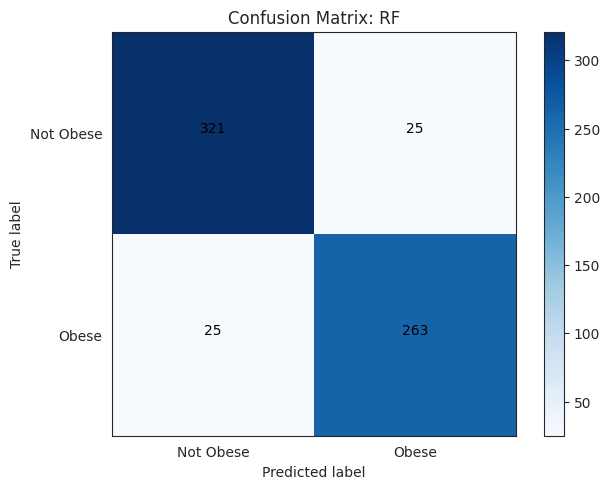

In [ ]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(x_train_hybrid, y_train_hybrid)


y_predict = model.predict(x_test_hybrid)
#print(y_predict)
#print(y_test_label)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Not Obese','Obese']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: RF')

metrics.iloc[0,:] = ['RF',accuracy_score(y_test, y_predict),
                     f1_score(y_test, y_predict),
                     precision_score(y_test,y_predict)]

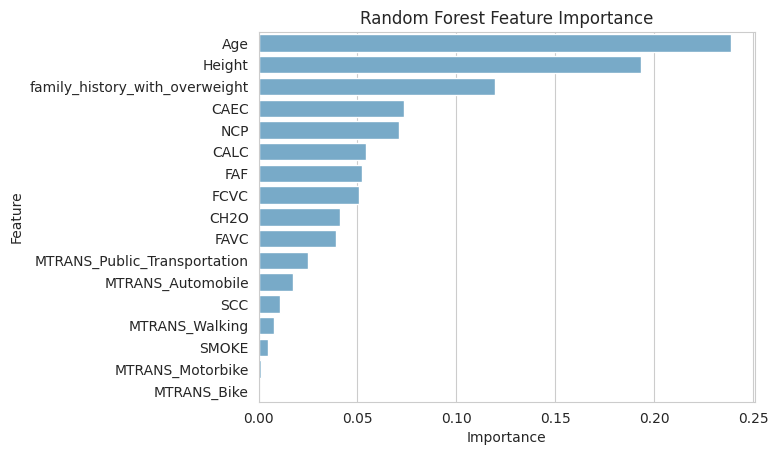

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train_hybrid.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances, color = color)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
type(x_test_hybrid)

pandas.core.frame.DataFrame

TypeError: ignored

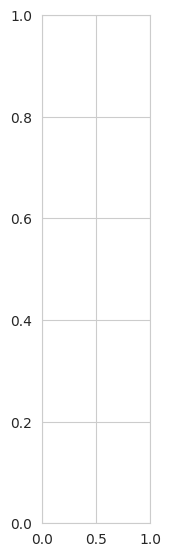

In [ ]:
import shap

# create an explainer object
explainer = shap.Explainer(model)

# calculate the shap values
shap_values = explainer(x_test_hybrid)

# plot the shap summary plot
shap.summary_plot(shap_values, x_test_hybrid, plot_type='dot')


In [ ]:
y_test.count()

634

2) Decision Tree Baseline

--------Decision Tree--------
Correctly classified instances: 536
Accuracy Score is 0.84543
Recall Score is 0.85417
Precision Score is 0.81457
F1 Score is 0.8339
     0    1
0  290   56
1   42  246
[[290  56]
 [ 42 246]]


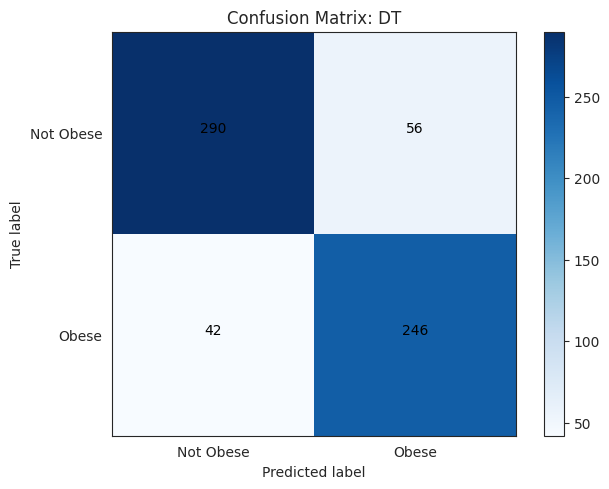

In [ ]:
print("--------Decision Tree--------")
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)

model_dt.fit(x_train_hybrid, y_train_hybrid)

y_predict = model_dt.predict(x_test_hybrid)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Not Obese','Obese']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: DT')

metrics.iloc[0,:] = ['DT',accuracy_score(y_test, y_predict),
                     f1_score(y_test, y_predict),
                     precision_score(y_test,y_predict)]

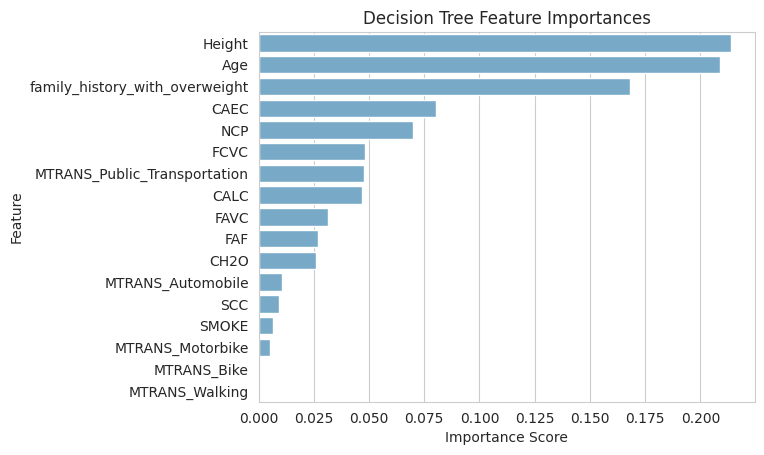

In [ ]:
# Feature Importance for Decision Tree
# plot feature importances
# define the color
color = cm.Blues(0.5)

importances = model_dt.feature_importances_
feature_importances = pd.DataFrame({'Feature': x_train_hybrid.columns,
                                    'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.barplot(x='Importance', y='Feature', data=feature_importances, color = color)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Learning Rate for Decision Tree

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

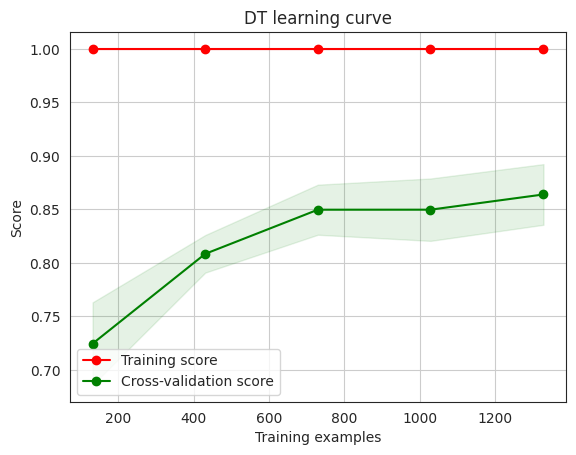

In [ ]:
plot_learning_curve(DecisionTreeClassifier(random_state = 42),
                    "DT learning curve",
                    x_train_hybrid, y_train_hybrid, cv= 10, n_jobs=4)
# start overfitting at a very early stage

3) Logistic Regression Baseline (BAD)

--------LR-------
Correctly classified instances: 502
Accuracy Score is 0.7918
Recall Score is 0.85764
Precision Score is 0.73077
F1 Score is 0.78914
     0    1
0  255   91
1   41  247
[[255  91]
 [ 41 247]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


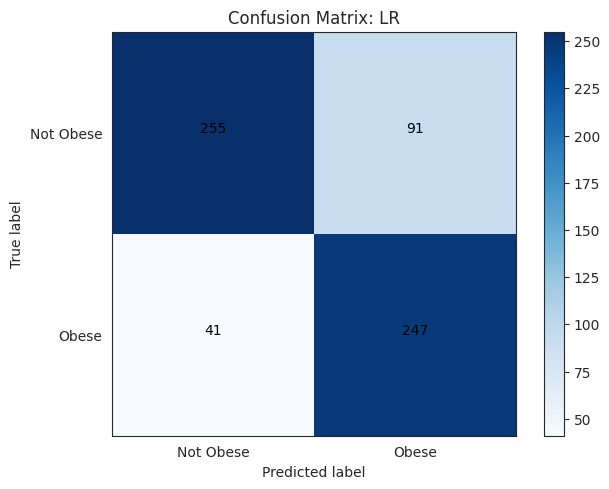

In [ ]:
print("--------LR-------")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100,random_state=42)
model.fit(x_train_hybrid, y_train_hybrid)


y_predict = model.predict(x_test_hybrid)

y_predict_fixed = np.logical_not(y_predict)
y_test_fixed = np.logical_not(y_test)

y_predict_fixed = y_predict_fixed.astype(int)
y_test_fixed = y_test_fixed.astype(int)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Not Obese','Obese']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: LR')

metrics.iloc[0,:] = ['LGBM',accuracy_score(y_test, y_predict), f1_score(y_test, y_predict), precision_score(y_test,y_predict)]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

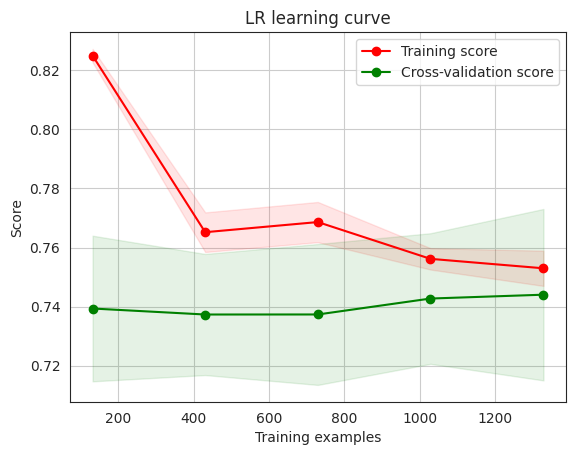

In [ ]:
plot_learning_curve(LogisticRegression(C=100,random_state=42),
                    "LR learning curve", x_train_hybrid, y_train_hybrid, 
                    cv= 10, n_jobs=4)

4) XGBOOST

--------XGBoost--------
Correctly classified instances: 575
Accuracy Score is 0.90694
Recall Score is 0.90625
Precision Score is 0.89078
F1 Score is 0.89845
     0    1
0  314   32
1   27  261
[[314  32]
 [ 27 261]]


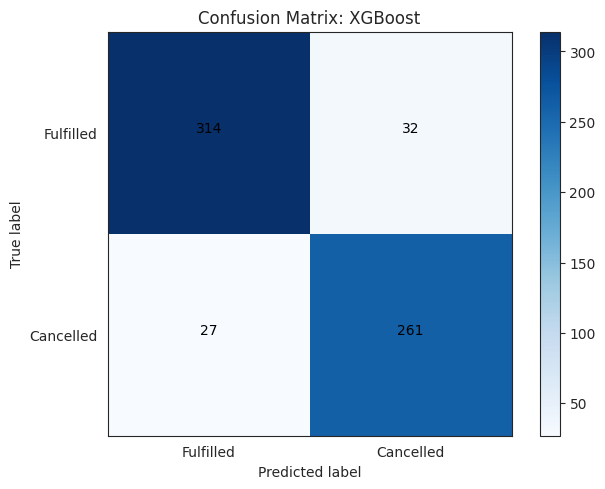

In [ ]:
from xgboost import XGBClassifier
print("--------XGBoost--------")
xgb = XGBClassifier(booster = 'gbtree', seed = 42)
xgb.fit(x_train_hybrid, y_train)

y_predict = xgb.predict(x_test_hybrid)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: XGBoost')

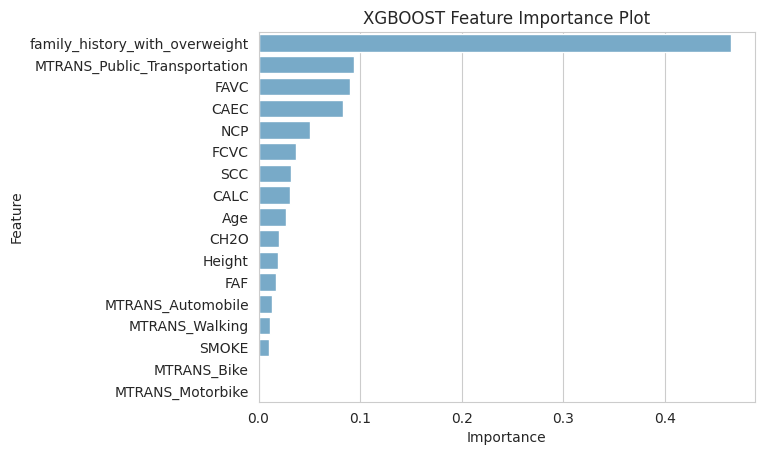

In [ ]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = xgb.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train_hybrid.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances, color = color)

# add a title to the plot
plt.title('XGBOOST Feature Importance Plot')

# show the plot
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


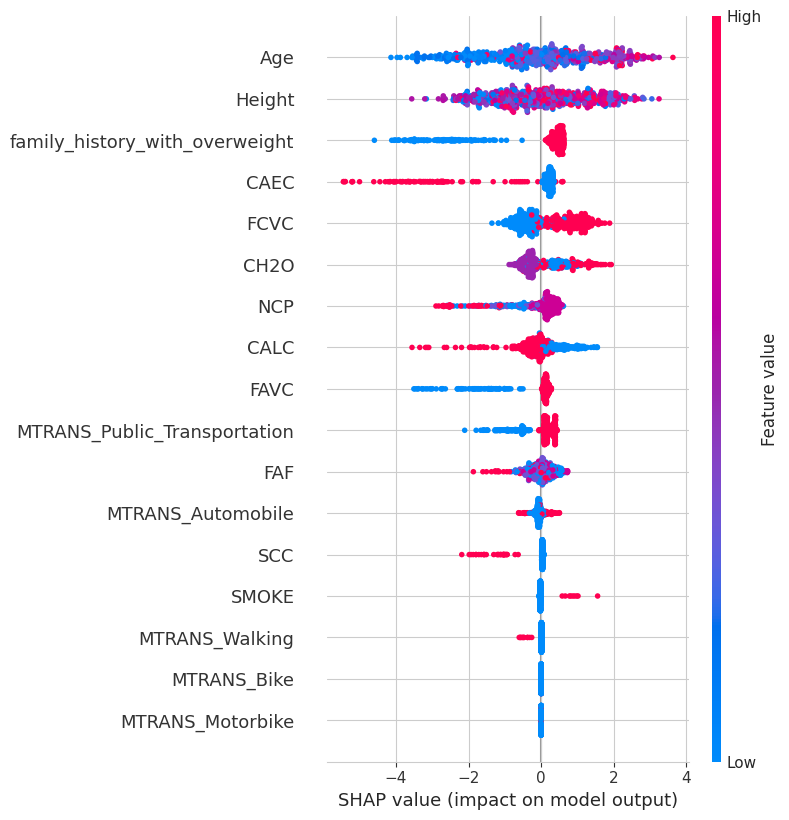

In [ ]:
import shap

# create an explainer object
explainer = shap.Explainer(xgb)

# calculate the shap values
shap_values = explainer(x_test_hybrid)

# plot the shap summary plot
shap.summary_plot(shap_values, x_test_hybrid, plot_type='dot')

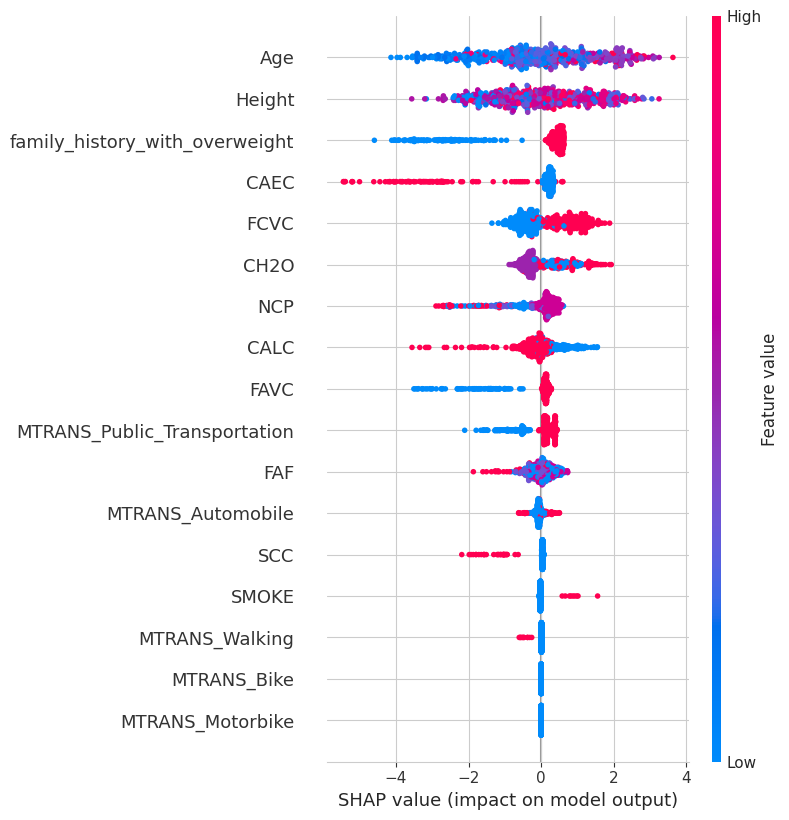

In [ ]:
shap.summary_plot(shap_values, 
                  x_test_hybrid,
                  plot_type='dot',
                  title='SHAP Summary Plot')

5) LightGBM

--------LGBM--------
Correctly classified instances: 571
Accuracy Score is 0.90063
Recall Score is 0.89236
Precision Score is 0.88927
F1 Score is 0.89081
     0    1
0  314   32
1   31  257
[[314  32]
 [ 31 257]]


Using categorical_feature in Dataset.


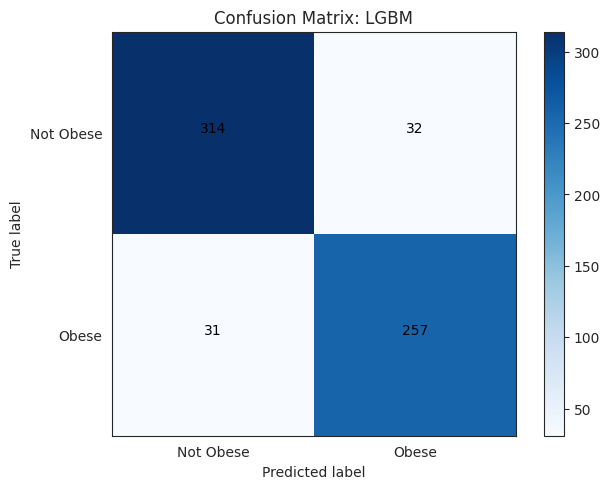

In [ ]:
print("--------LGBM--------")
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state = 42)
model.fit(x_train_hybrid, y_train,
          categorical_feature=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                               16]
          )


y_predict = model.predict(x_test_hybrid)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Not Obese','Obese']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: LGBM')

metrics.iloc[0,:] = ['LGBM',accuracy_score(y_test, y_predict), f1_score(y_test, y_predict), precision_score(y_test,y_predict)]

Text(0, 0.5, 'Feature')

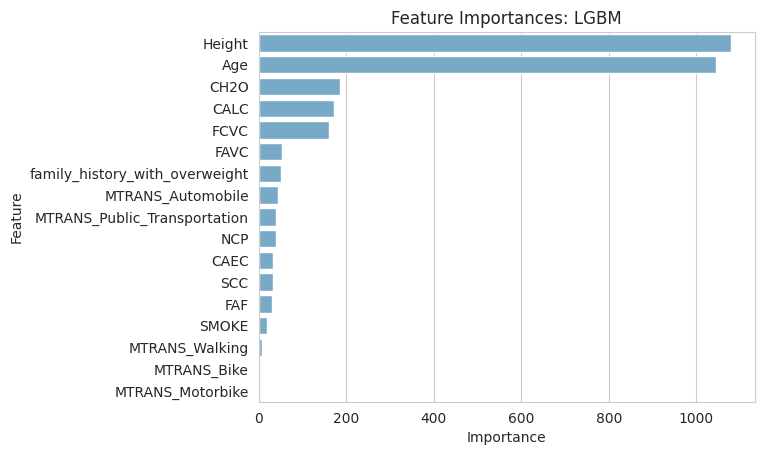

In [ ]:
# Get feature importances
importances = model.feature_importances_

# define the color
color = cm.Blues(0.5)

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train_hybrid.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances, color = color)
plt.title('Feature Importances: LGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')

TypeError: ignored

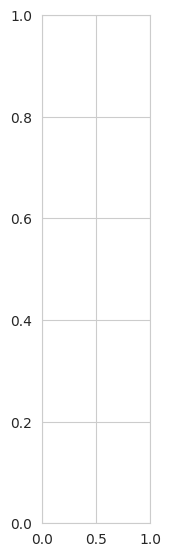

In [ ]:
import shap

# create an explainer object
explainer = shap.Explainer(model)

# calculate the shap values
shap_values = explainer(x_test_hybrid)

# plot the shap summary plot
shap.summary_plot(shap_values, x_test_hybrid, plot_type='dot')